# Generate weak labels for LV cavity area in SAX view echo images.

- Goal: Automatically segment LV cavity area. 
- HED predictions were able to find the contours around the LV cavity area. However, due to circles location errors in the HED labels (Hough circles), HED prediction highlights other existing structures in the SAX view, such as the RV. 
- Hypothesis: HED prediction segments well the LV cavity, but has errors due to the Hough labels. Can we improve the quality of LV cavity segmentation generated by the HED model if we focus only on this structure?
- Method: Thus at this step, we propose to extract only the internal region of HED prediction and then train a unet to correct HED errors.

- Note: Filled HED predictions are used as labels to train a Unet model in Step 3 of SAX segmentation methodology.



In [1]:
import numpy as np
from glob import glob
import cv2
import os
import matplotlib.pyplot as plt

2024-08-13 23:51:33.587611: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer.so.6'; dlerror: libnvinfer.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:51:33.587693: W tensorflow/stream_executor/platform/default/dso_loader.cc:55] Could not load dynamic library 'libnvinfer_plugin.so.6'; dlerror: libnvinfer_plugin.so.6: cannot open shared object file: No such file or directory
2024-08-13 23:51:33.587698: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:30] Cannot dlopen some TensorRT libraries. If you would like to use Nvidia GPU with TensorRT, please make sure the missing libraries mentioned above are installed properly.


## Generate labels to training an unet model using HED predictions.

In [3]:
def step3_visualization(indir):
    filenames = glob(os.path.join(indir, 'sax_images/*.npy'))

    for filename in filenames:
       
        ID = os.path.basename(filename)
        img_fov = np.load(filename)
        img_hed = np.load(os.path.join(indir, 'sax_hed_preds', ID))
        img_shapes = np.load(os.path.join(indir, 'sax_shapes', ID))
        img_filled = np.load(os.path.join(indir, 'sax_filled_masks', ID))

        img_480 = cv2.resize(img_fov, (480,480), interpolation = cv2.INTER_AREA)
        img_480 = (img_480 - img_480.min()) / (img_480.max() - img_480.min())

        fig, ax_arr = plt.subplots(1, 4, sharex=False, sharey=False, figsize=(30, 20))

        ax1, ax2, ax3, ax4 = ax_arr.ravel()

        ax1.imshow(img_480[...,0], cmap='gray')
        ax1.set_title(f'Original img', fontsize=20)
        ax1.set_ylabel(ID, fontsize=20)

        ax2.imshow(img_hed, cmap="gray")
        ax2.set_title(f'HED Prediction', fontsize=20)

        ax3.imshow(img_shapes, cmap="gray")
        ax3.set_title(f'HED Predictions Filled', fontsize=20)

        ax4.imshow(img_filled, cmap="gray")
        ax4.set_title(f'HED largest comp', fontsize=20)

        plt.show()

## Visualize examples

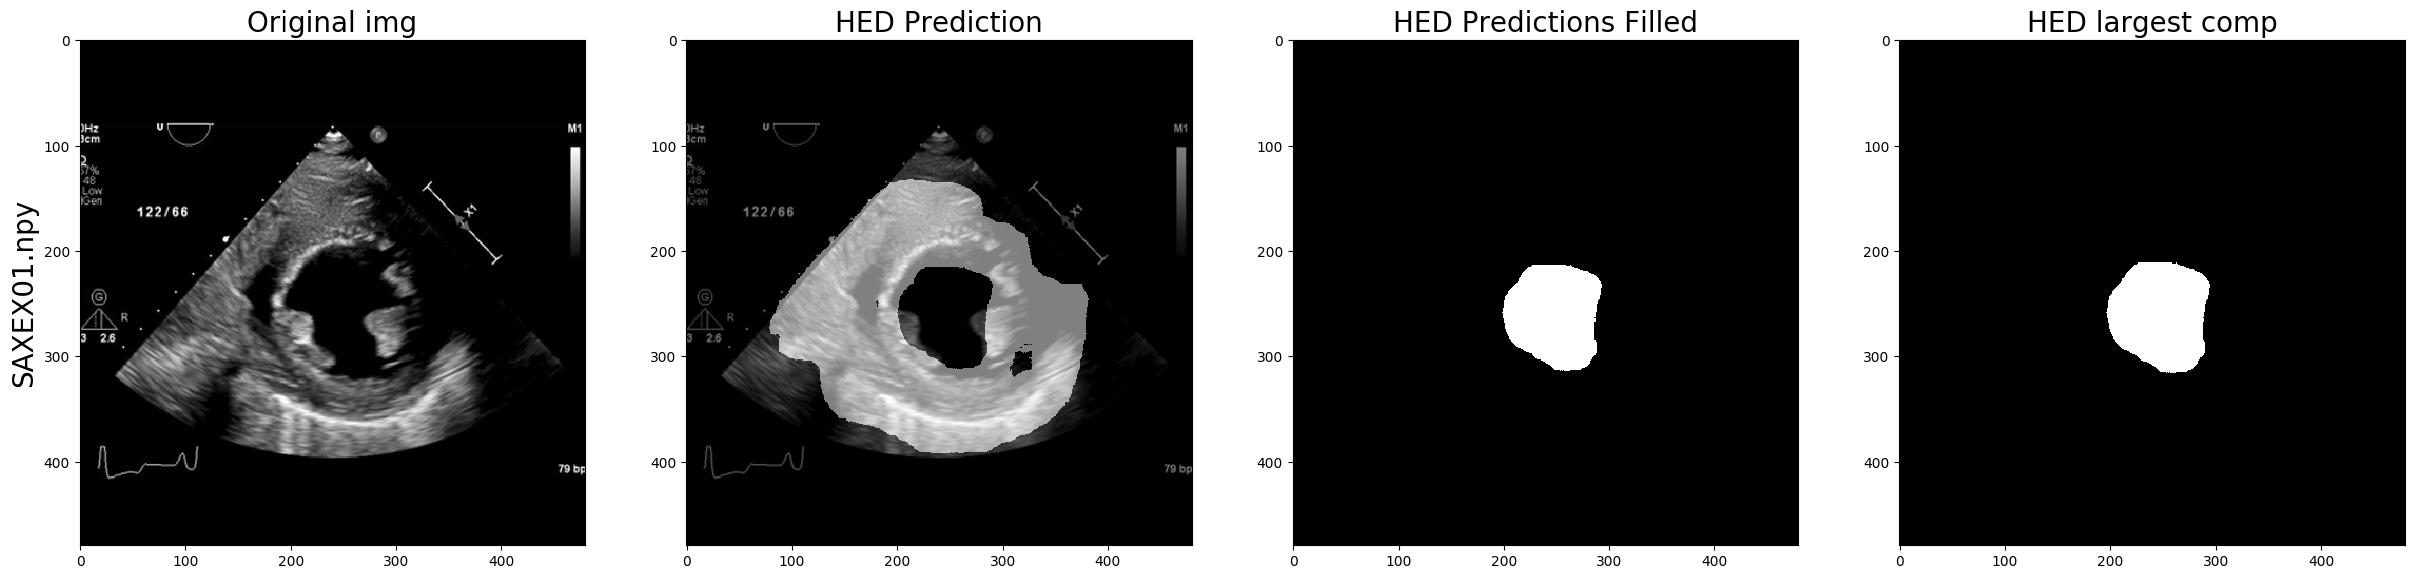

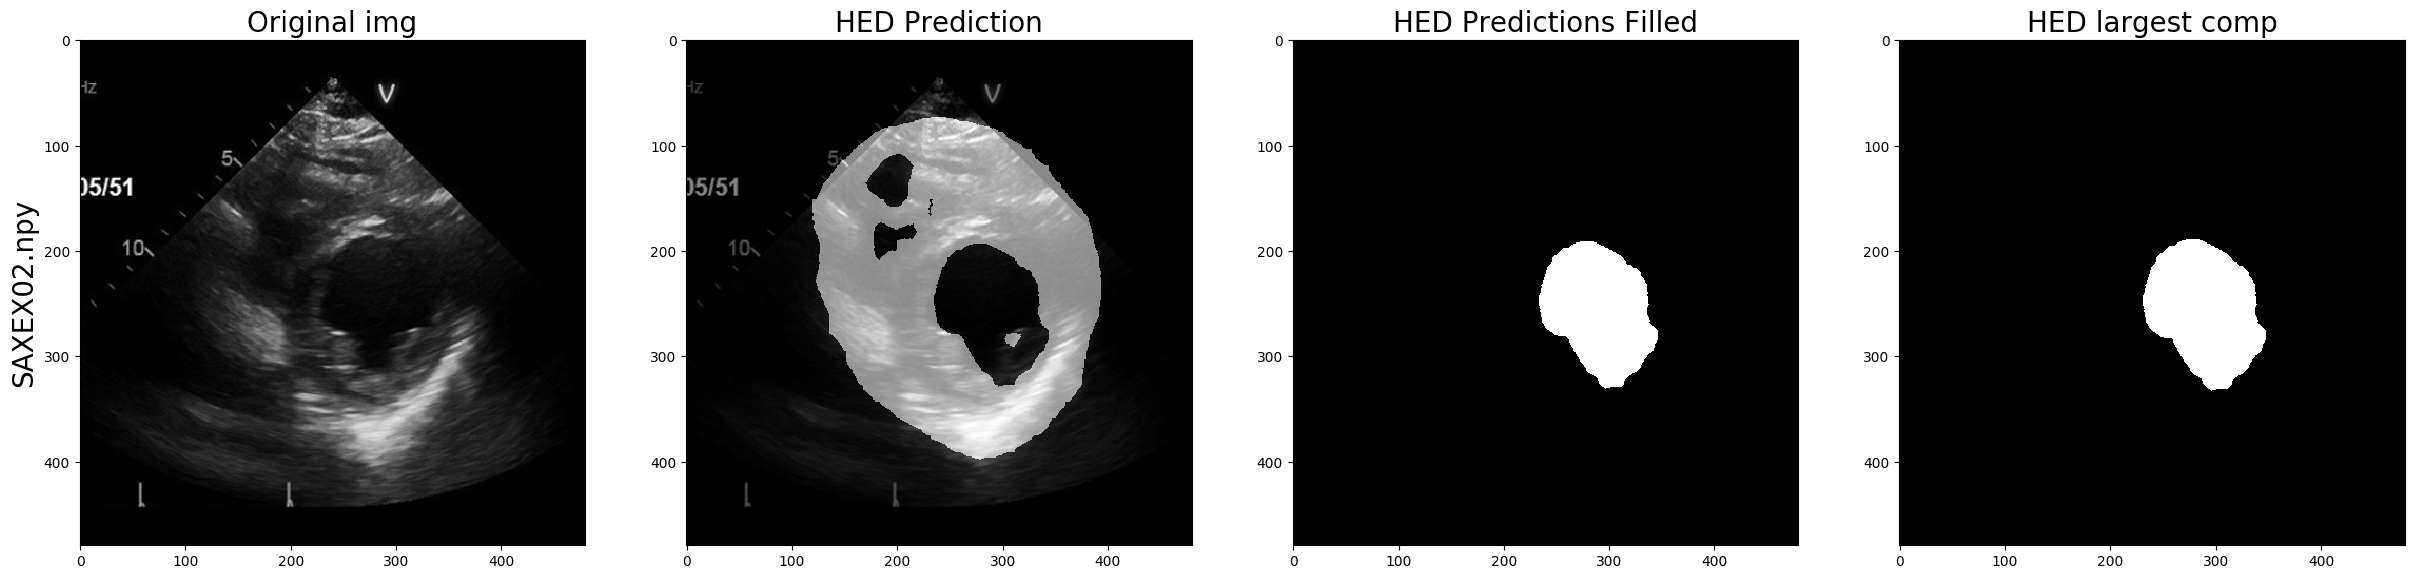

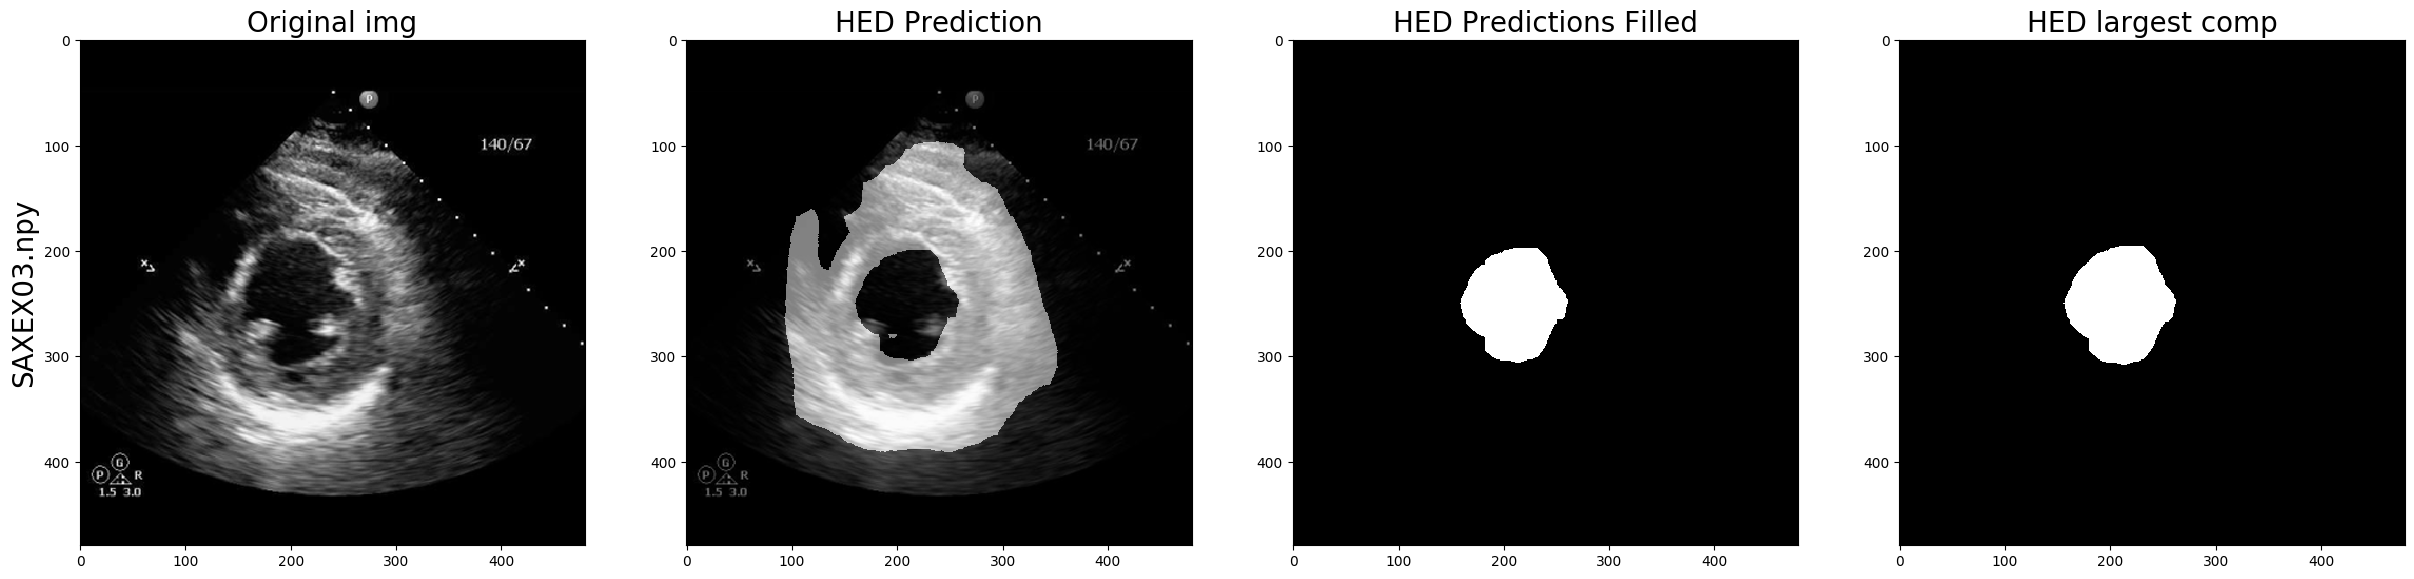

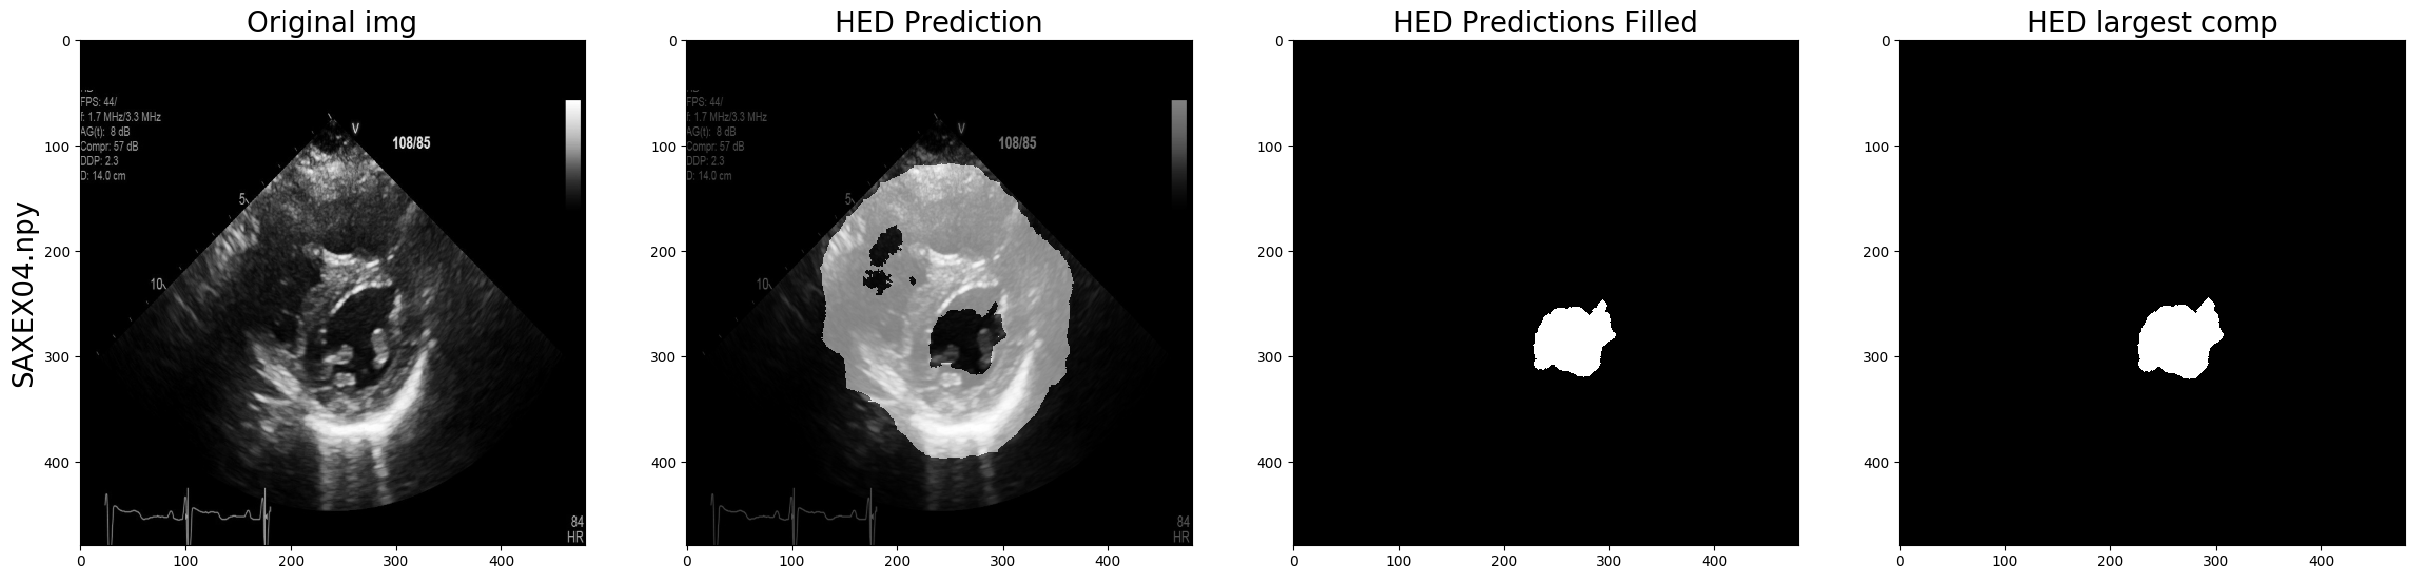

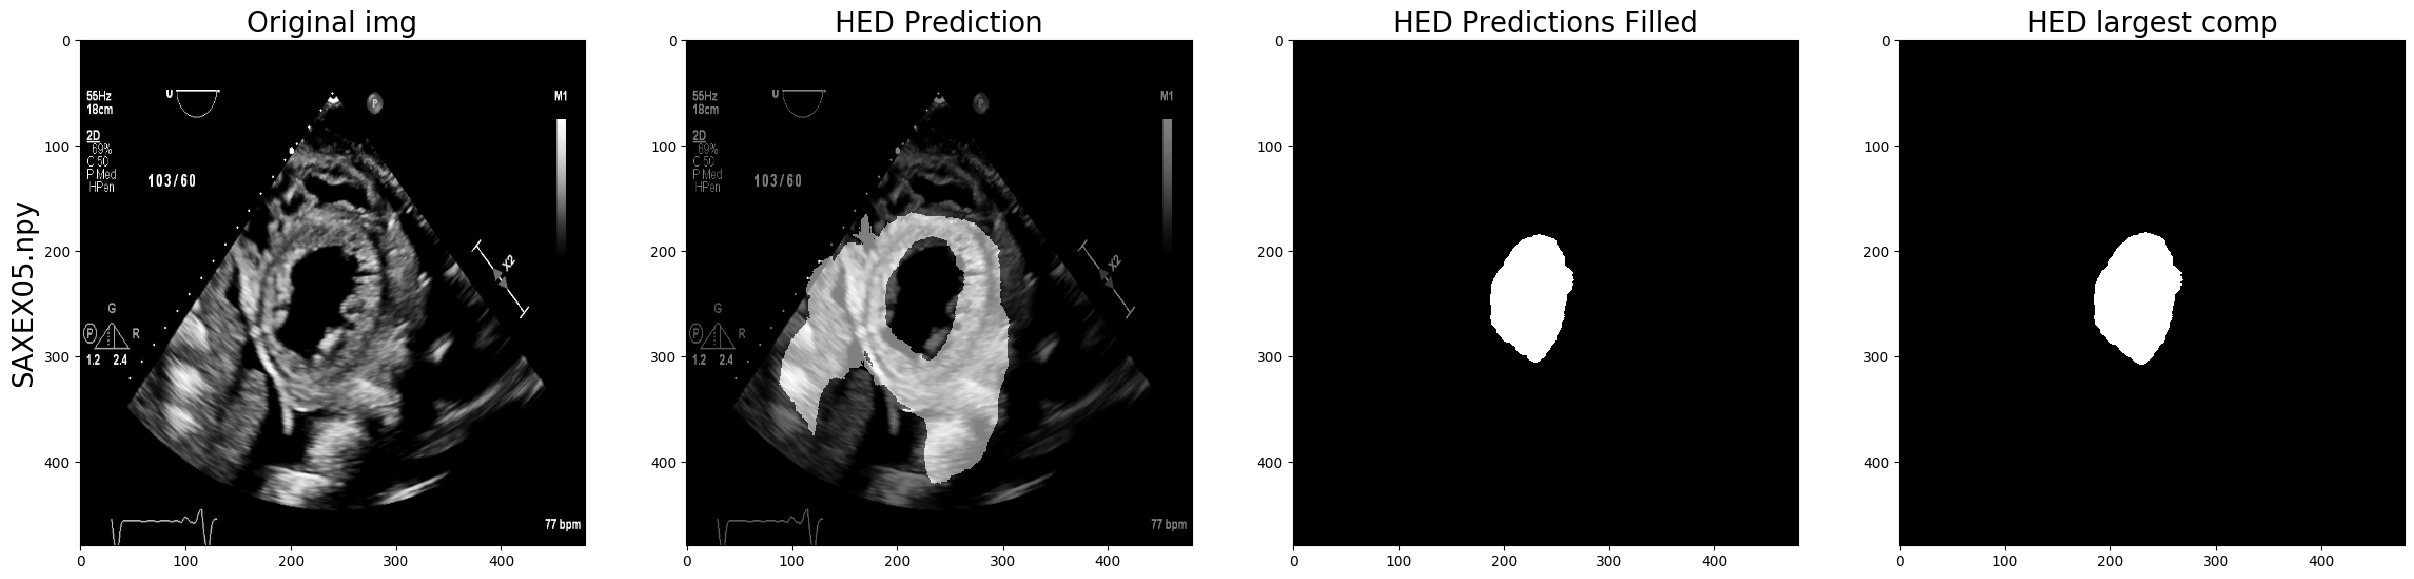

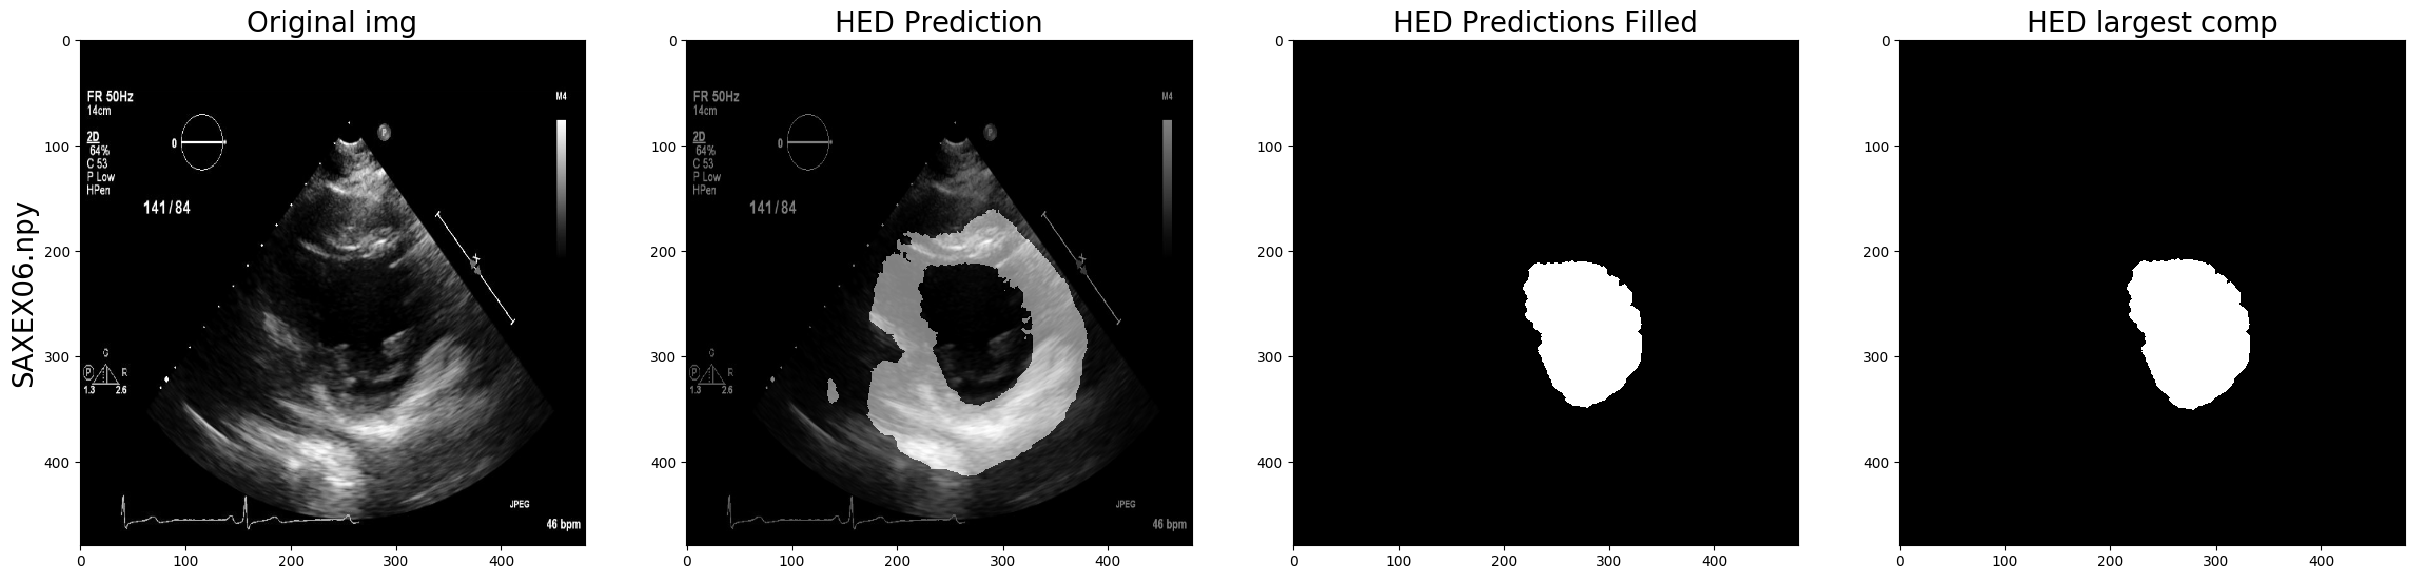

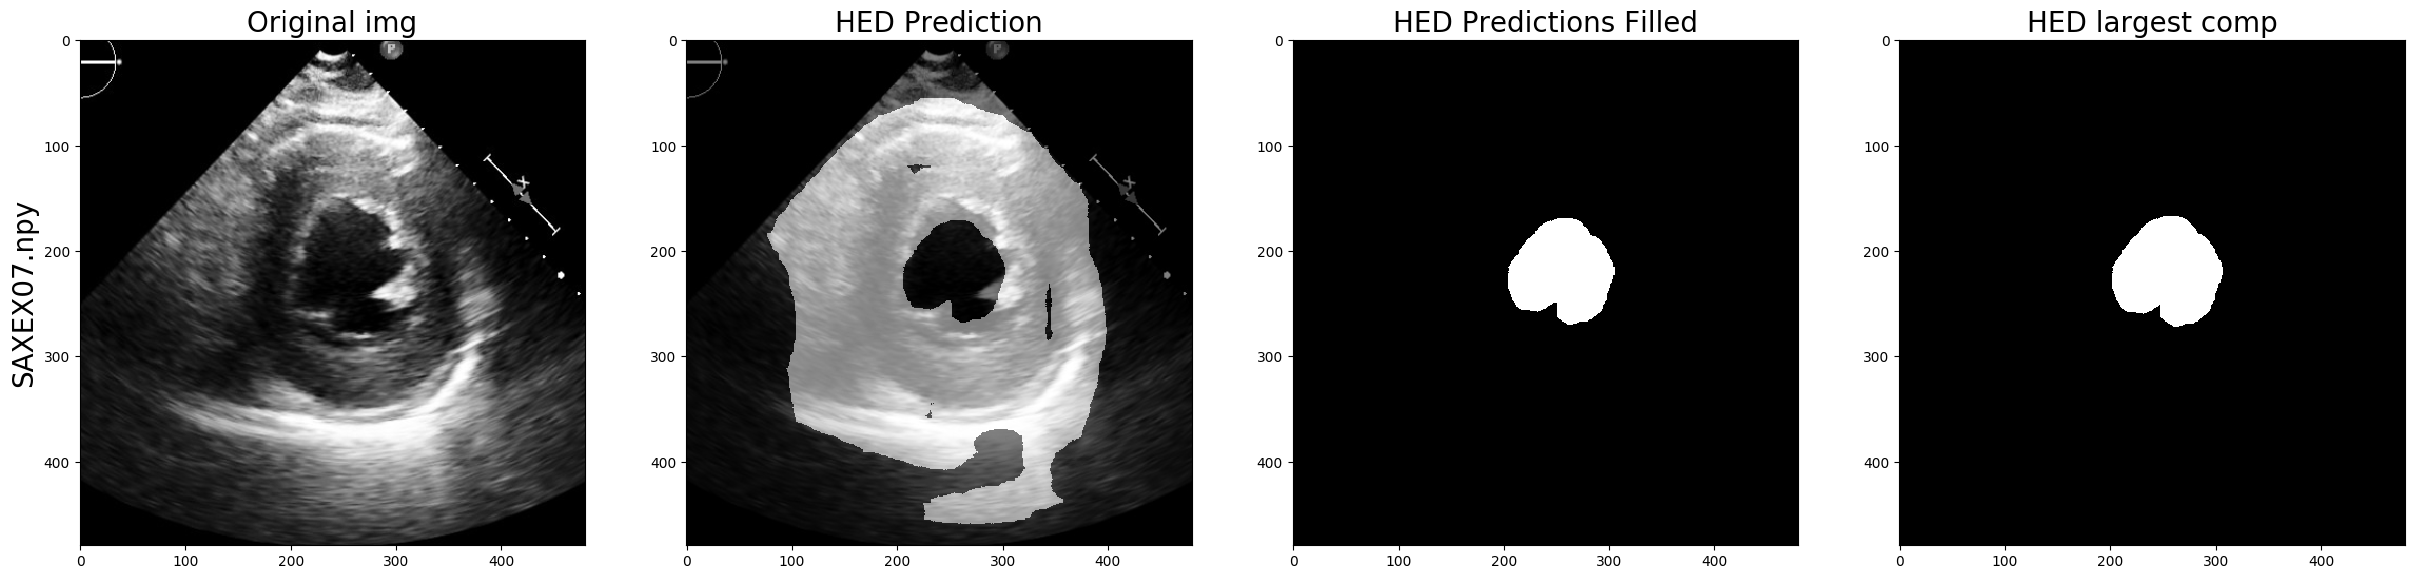

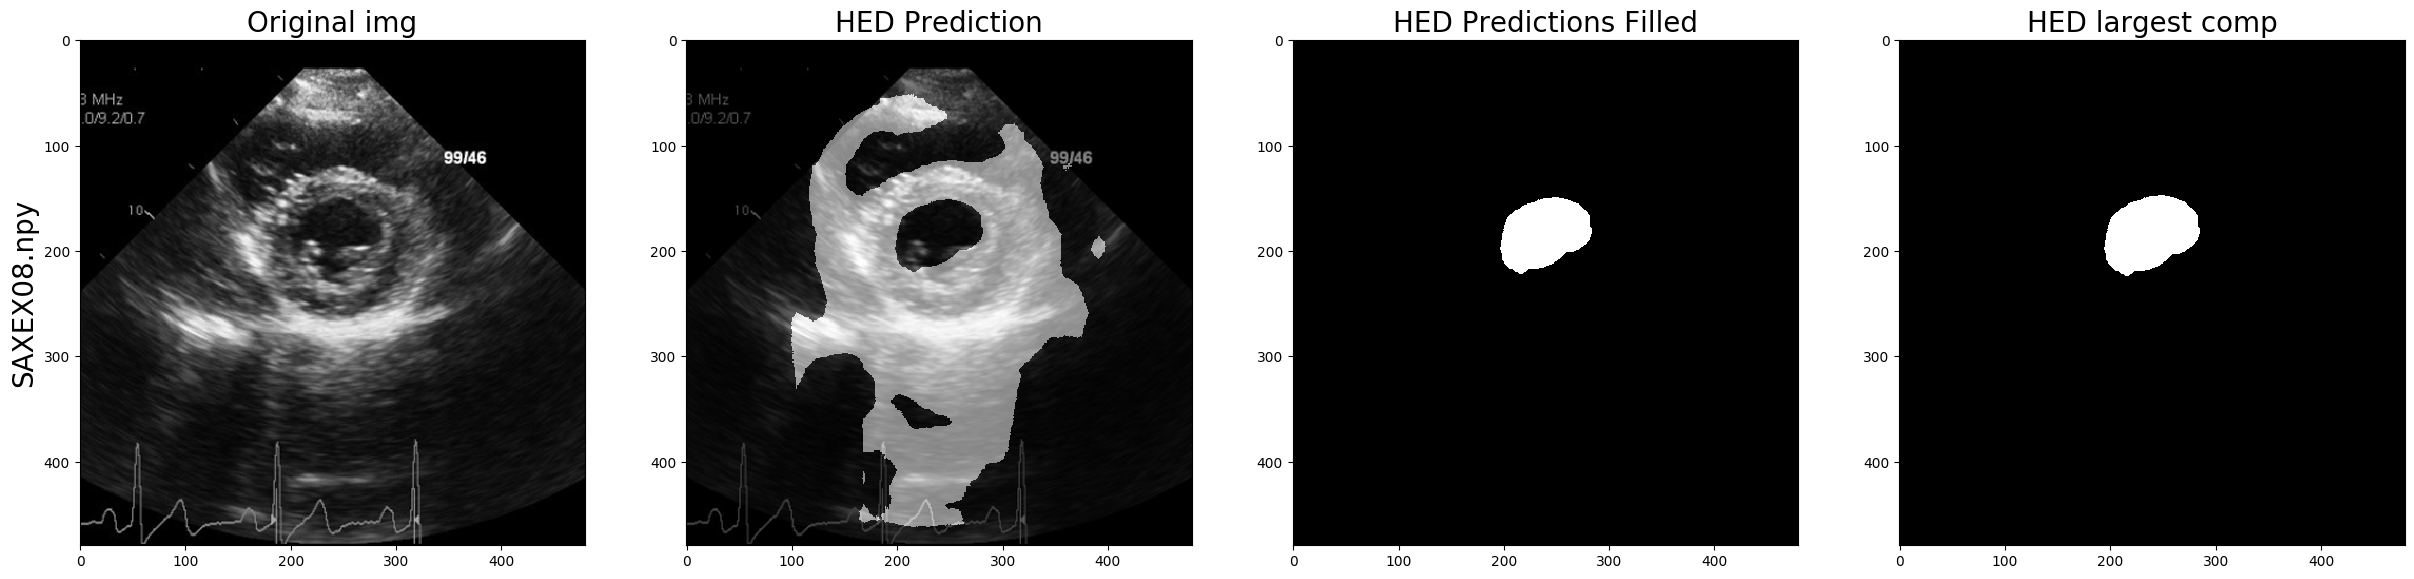

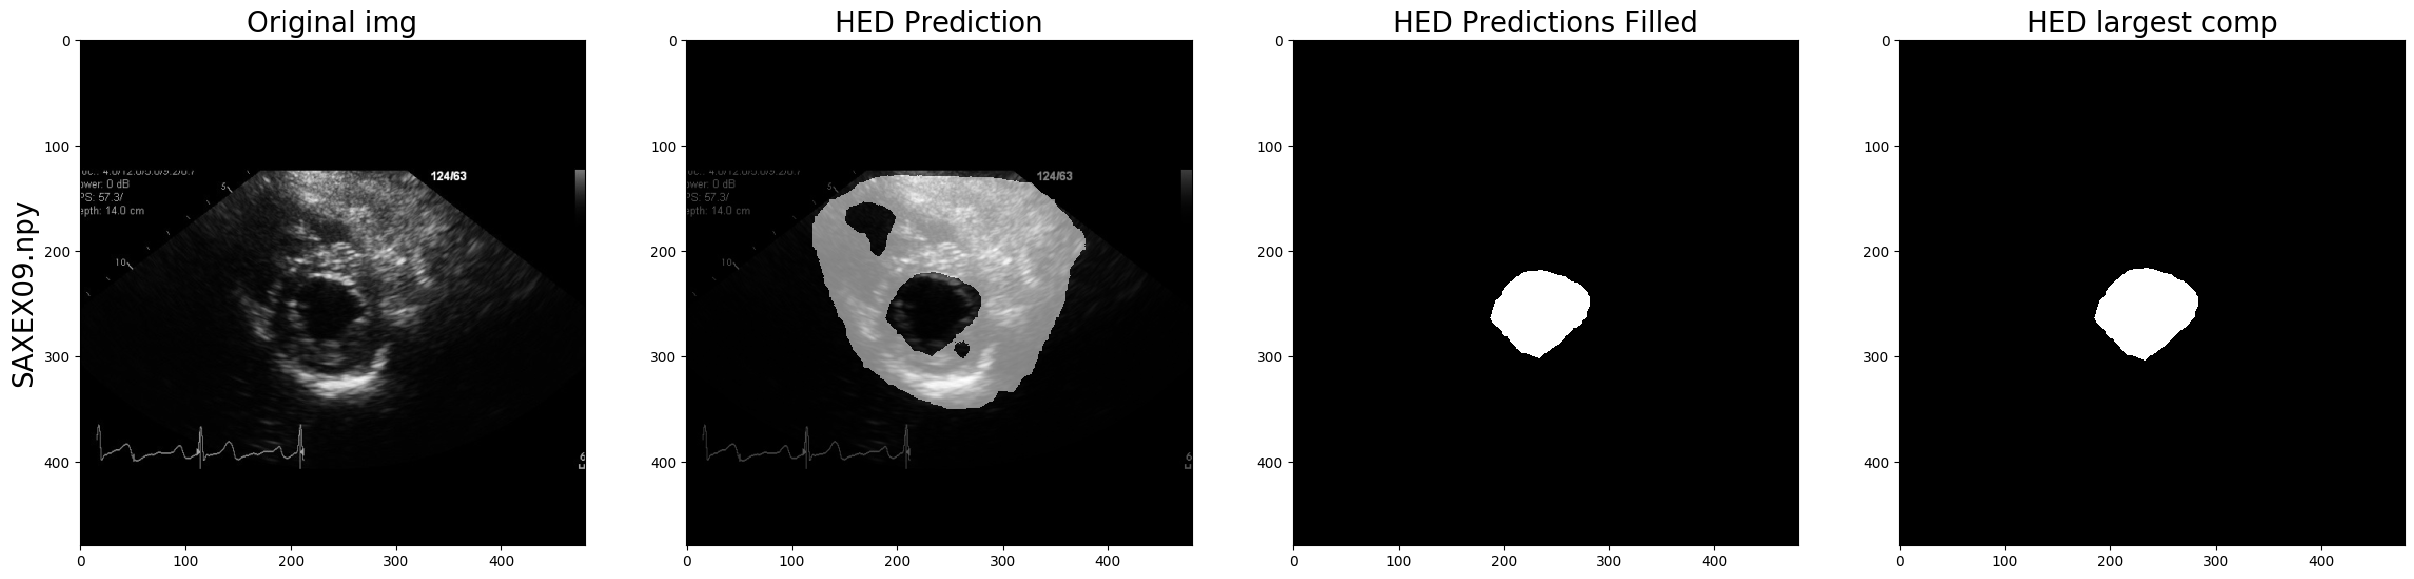

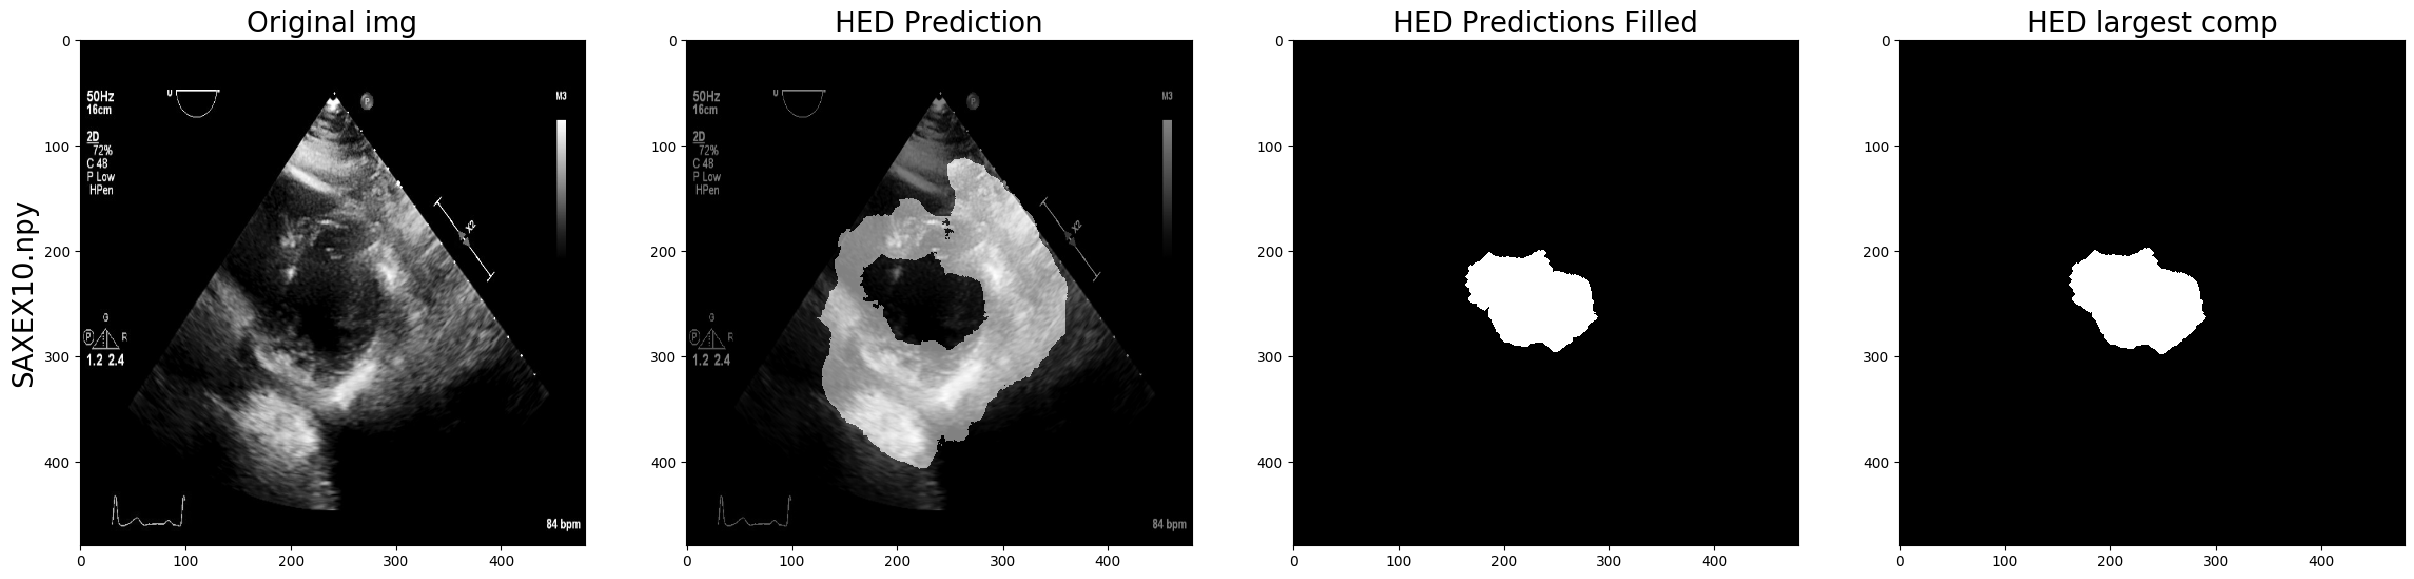

In [4]:
base_from = "example_data/SAX"

step3_visualization(base_from)